In [1]:
import tensorflow as tf
import os

In [2]:
gpus =tf.config.experimental.list_physical_devices("GPU")
cpus =tf.config.experimental.list_physical_devices("CPU")

In [3]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### Remove Dodgy images

In [4]:
import os
import cv2
import imghdr

data_dir = "data"
image_exts = ["jpeg", "jpg", "png", "gif", "bmp"]  # Add the image extensions you want to allow

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15200\715960294.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### Load Dataset

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 181 files belonging to 2 classes.


In [7]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
data_itr = data.as_numpy_iterator()

In [9]:
batch = data_itr.next()


In [10]:
len(batch)

2

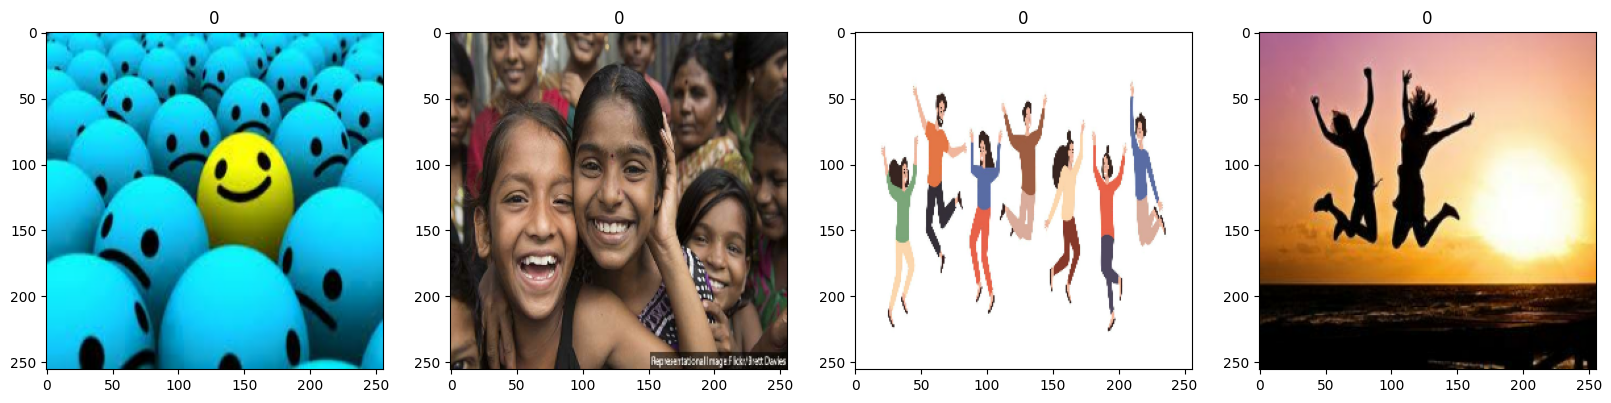

In [11]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [12]:
data = data.map(lambda x,y: (x/255,y))

In [13]:
scaled_itr = data.as_numpy_iterator()

In [14]:
batch = scaled_itr.next()

In [15]:
batch[0].max()

1.0

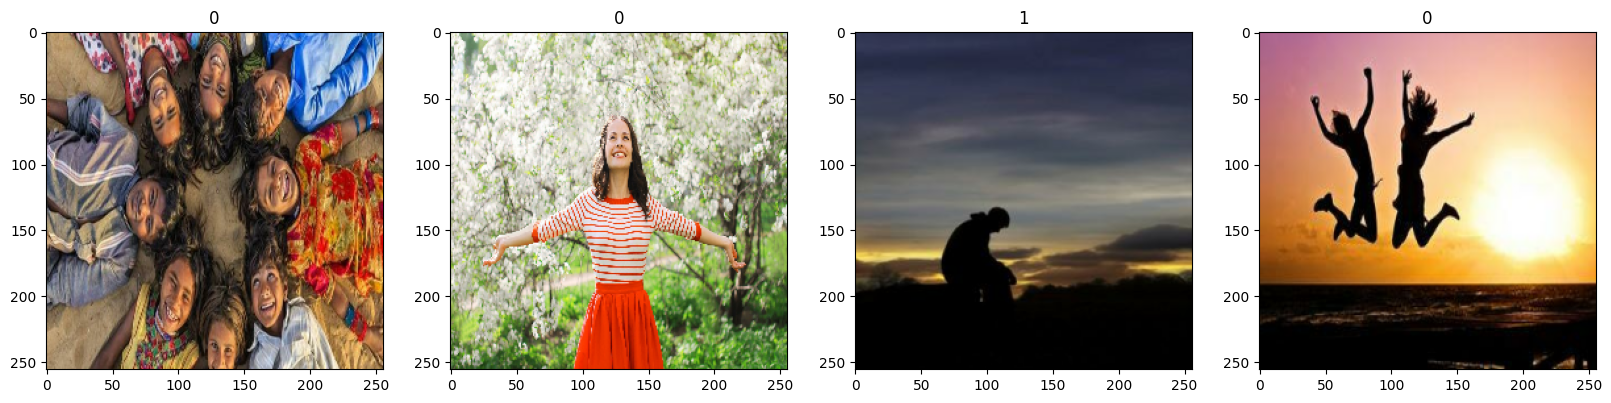

In [16]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split the data

In [55]:
len(data)

6

In [33]:
train_size=int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1


In [34]:
train_size+val_size+test_size

7

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Model Building

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model=Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


4/4 [==============================] - 7s 1s/step - loss: 0.7712 - accuracy: 0.5938 - val_loss: 0.7036 - val_accuracy: 0.5283
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6390 - accuracy: 0.5469 - val_loss: 0.5724 - val_accuracy: 0.6038
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 0.5811 - accuracy: 0.6094 - val_loss: 0.5250 - val_accuracy: 0.7925
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.5341 - accuracy: 0.7656 - val_loss: 0.5086 - val_accuracy: 0.7358
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.4348 - accuracy: 0.8359 - val_loss: 0.5660 - val_accuracy: 0.6604
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.4457 - accuracy: 0.8203 - val_loss: 0.4739 - val_accuracy: 0.8302
Epoch 7/20
4/4 [==============================] - 6s 1s/step - loss: 0.3402 - accuracy: 0.9062 - val_loss: 0.3659 - val_accuracy: 0.8679
Epoch 8/20
4/4 [==============================] - 6s

In [44]:
print(hist.history)

{'loss': [0.7712374925613403, 0.6389795541763306, 0.5811150074005127, 0.534145712852478, 0.4347975552082062, 0.44574224948883057, 0.34015148878097534, 0.277737021446228, 0.298374742269516, 0.194057434797287, 0.1465017944574356, 0.1163550540804863, 0.14424026012420654, 0.08224399387836456, 0.04955168813467026, 0.02967769466340542, 0.02266847714781761, 0.016643578186631203, 0.009008721448481083, 0.0075808335095644], 'accuracy': [0.59375, 0.546875, 0.609375, 0.765625, 0.8359375, 0.8203125, 0.90625, 0.9140625, 0.921875, 0.9609375, 0.96875, 0.9765625, 0.9453125, 0.9765625, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.7036195993423462, 0.5723894238471985, 0.5250298976898193, 0.508632242679596, 0.566028356552124, 0.4738561511039734, 0.3659382164478302, 0.36383259296417236, 0.2259274423122406, 0.1398676335811615, 0.1529284566640854, 0.11213558167219162, 0.08990120142698288, 0.03576911240816116, 0.029562702402472496, 0.01877044327557087, 0.017628666013479233, 0.009041206911206245, 0.0038573122

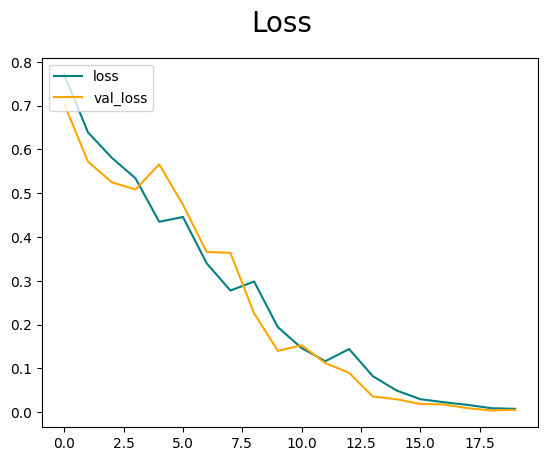

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

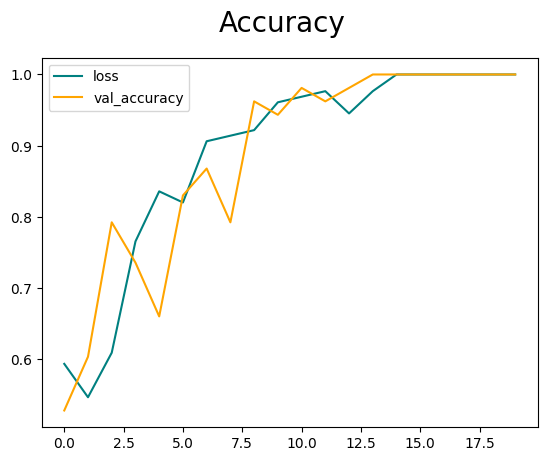

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Evaluation

In [54]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [55]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


In [59]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 0.0


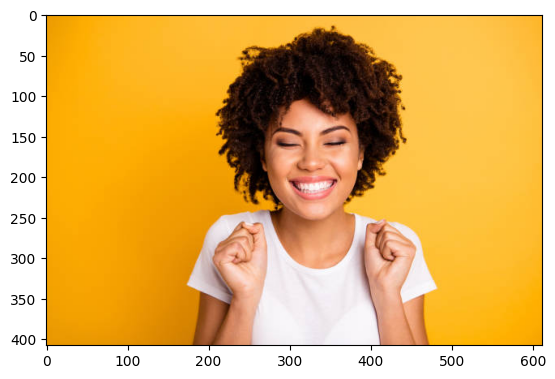

In [74]:
img = cv2.imread('1132928286.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

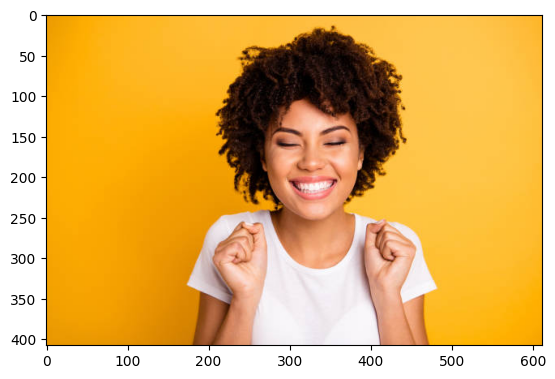

In [75]:
resize = tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [76]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 55ms/step


In [79]:
if yhat < 0.5:
    print("Predicted class is Happy")
else:
    print("Predicted class is Sad")

Predicted class is Happy


### Save the model

In [80]:
from tensorflow.keras.models import load_model

In [81]:
model.save(os.path.join('models','happysadmodel.h5'))

c:\Users\ASUS\Desktop\CustomImageClassifier\CustomImageClassiferVenv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [84]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 82ms/step


In [85]:
if yhat_new < 0.5:
    print("Predicted class is Happy")
else:
    print("Predicted class is Sad")

Predicted class is Happy
